## PCA, K-Means

- May need to install 'xlrd'

```
conda install xlrd
```

- Use jupyter-notebook instead of jupyterlab since it requires Plotly which requires a javascript library, not available in jupyterlab

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Need to install xlrd 'conda install xlrd'
dataset = pd.read_excel('../Resources/dataCortexNuclear.xls')
dataset.head(100) 

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3499_6,0.357394,0.550142,0.306516,2.428669,3.843513,0.201020,0.154334,3.597620,0.194108,...,0.114665,0.435540,0.166357,0.138527,0.151171,1.593467,Control,Memantine,C/S,c-CS-m
96,3499_7,0.288177,0.454274,0.266097,2.009259,3.161823,0.187607,0.143875,3.076353,0.164957,...,0.104760,0.396691,0.162472,0.141771,0.156434,1.593664,Control,Memantine,C/S,c-CS-m
97,3499_8,0.287307,0.457690,0.264008,2.003859,3.103774,0.185106,0.143939,3.060034,0.159091,...,0.112806,0.405776,0.154614,0.143930,0.156937,1.537163,Control,Memantine,C/S,c-CS-m
98,3499_9,0.297350,0.475371,0.268154,2.095074,3.307082,0.203923,0.148825,3.285821,0.167690,...,0.111381,0.385285,0.162601,0.145109,0.154836,1.540591,Control,Memantine,C/S,c-CS-m


## Dataset

### Mice Protein Expression Data Set

**Abstract:** Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.

### Dataset information

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

**Classes:**

- c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
- c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
- c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
- c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)
___
- t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
- t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
- t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
- t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

The aim is to identify subsets of proteins that are discriminant between the classes.

**Attribute Information:**

- (1) Mouse ID
- (2-78) Values of expression levels of 77 proteins; the names of proteins are followed by â€œ_nâ€ indicating that they were measured in the nuclear fraction. For example: DYRK1A_n
- (79) Genotype: control (c) or trisomy (t)
- (80) Treatment type: memantine (m) or saline (s)
- (81) Behavior: context-shock (CS) or shock-context (SC)
- (82) Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m

@ CC [ Higuera C, Gardiner KJ, Cios KJ (2015) Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model of Down Syndrome. PLoS ONE 10(6): e0129126 ](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression)

**Source:**

*Clara Higuera Department of Software Engineering and Artificial Intelligence, Faculty of Informatics and the Department of Biochemistry and Molecular Biology, Faculty of Chemistry, University Complutense, Madrid, Spain.*

*Katheleen J. Gardiner, creator and owner of the protein expression data, is currently with the Linda Crnic Institute for Down Syndrome, Department of Pediatrics, Department of Biochemistry and Molecular Genetics, Human Medical Genetics and Genomics, and Neuroscience Programs, University of Colorado, School of Medicine, Aurora, Colorado, USA.*

*Krzysztof J. Cios is currently with the Department of Computer Science, Virginia Commonwealth University, Richmond, Virginia, USA, and IITiS Polish Academy of Sciences, Poland.*

### Data preprocessing

- Dealing with missing information
- Removing irrelevant information
- Converting categorical data to numeric for labelling

**Classes**

| Categorical   | Numeric       |
| ------------- |:-------------:|
| c-CS-m      | 0 |
| c-SC-m     | 1 |
| c-CS-s | 2 |
| c-SC-s | 3 |
| t-CS-m | 4 |
| t-SC-m | 5 |
| t-CS-s | 6 |
| t-SC-s | 7 |


In [37]:
# Mice id, Genotype, treatment and behaviour are removed( since they are categorical )
dataset.drop(['MouseID', 'Genotype', 'Treatment','Behavior'], axis=1, inplace=True)

# Converting categorical values 'y' to numeric
dataset.rename(columns={'class':'label'}, inplace = True)
dataset['label'] = pd.factorize(dataset.label)[0]

# Checking for missing value
dataset.isnull().head(15)
dataset.isnull().sum()

# Dropping missing value
dataset.dropna(inplace=True)

X = dataset.iloc[:1000, :-1].values

# last row of the dataset is a label needed later for color labeling
y = dataset.iloc[:1000, -1].values

n_samples, n_features = X.shape
print("\nNumber of Samples :" + str(n_samples))
print("Feature Dimension :" + str(n_features))

# Dataset Lookup
print("\nShape of Dataframe:")
print(dataset.shape)
dataset.head()


Number of Samples :552
Feature Dimension :77

Shape of Dataframe:
(552, 78)


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,label
75,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,...,0.139052,0.112926,0.132001,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,0
76,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,...,0.133787,0.121607,0.139008,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,0
77,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,...,0.142324,0.130261,0.134804,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,0
78,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,...,0.133637,0.107321,0.118982,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,0
79,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,...,0.133358,0.112851,0.128635,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631,0


Text(0.5, 1.0, 'Distribution of Mice Proteins')

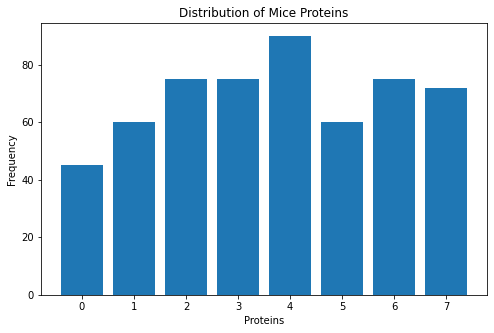

In [38]:
from collections import defaultdict

num_stats = defaultdict(int)

for num in y:
    num_stats[num] += 1
    
xAx = sorted(num_stats)
yAx = [num_stats[num] for num in xAx]

plt.figure(figsize =(8,5))
plt.bar(xAx, height=yAx)
plt.xlabel("Proteins")
plt.ylabel("Frequency")
plt.title("Distribution of Mice Proteins")

Text(0.5, 1.0, "Single Variable's Exlained Variance")

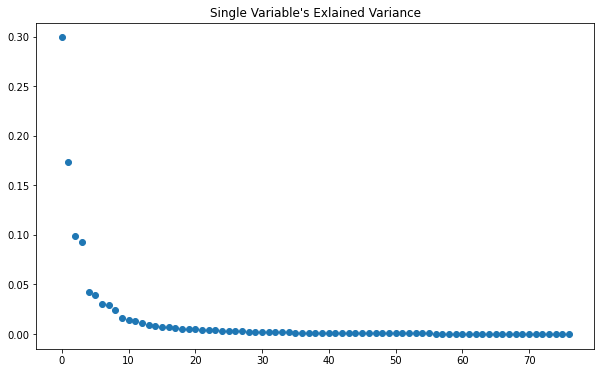

In [43]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalizing the data
X_std = StandardScaler().fit_transform(X)

# Determine explained variance of each variables
pca = PCA(n_components=77).fit(X_std)

plt.figure(figsize=(10,6))
plt.scatter(list(range(77)), pca.explained_variance_ratio_)
plt.title("Single Variable's Exlained Variance")

Text(0.5, 1.0, "Cumulative Variable's Exlained Variance")

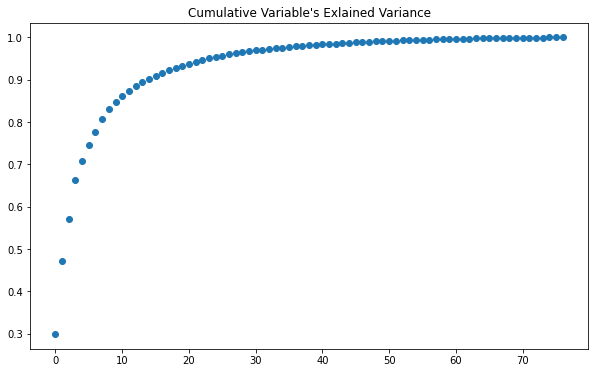

In [41]:
# Determine explained variance of cumulative variables
from sklearn.decomposition import PCA

pca = PCA(n_components=77).fit(X_std)

plt.figure(figsize=(10,6))
plt.scatter(list(range(77)), pca.explained_variance_ratio_.cumsum())
plt.title("Cumulative Variable's Exlained Variance")

## Principal Component analysis

Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.

In [50]:
from sklearn import decomposition
# Standardising the values
pca_std = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit(pca_std).transform(X)

In [51]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go

# Use Plotly to plot PCA
data = [go.Scatter(
    x = X_reduced[:,0],
    y = X_reduced[:,1],
    mode = 'markers',
    showlegend = False,
    marker = dict(
        size = 8,
        color = y,
        colorscale ='Rainbow',
        showscale = True,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='PCA')
# fig.write_html('first_figure.html', auto_open=True)

## K means Clustering

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0).fit(X_reduced)

kmeans_8 = kmeans.labels_

data = [
    go.Scatter(
        x= X_reduced[:, 0], 
        y= X_reduced[:, 1], 
        mode="markers",
        showlegend=False,
        marker=dict(
            size=8,
            color = kmeans_8,
            colorscale = 'Rainbow',
            showscale=True, 
            line = dict(
                width = 2,
                color = 'rgb(255, 255, 255)'
            )))]

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= True
)

fig = dict(data = data, layout = layout)
py.iplot(fig, filename="kmeans_plot")

Above we can see the cluster of mice with different classes
***